In [1]:
import sys

sys.path.insert(0, "..")

In [2]:
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection

from funbin.einstein.ported import aperiodic_monotile_raw, base_tile_state, extended_state
from funbin.einstein.vectorized import aperiodic_monotile_raw as aperiodic_monotile_raw_2
from funbin.einstein.vectorized import base_tile_state as base_tile_state_2
from funbin.einstein.vectorized import extended_state as extended_state_2
from funbin.geometry import Box

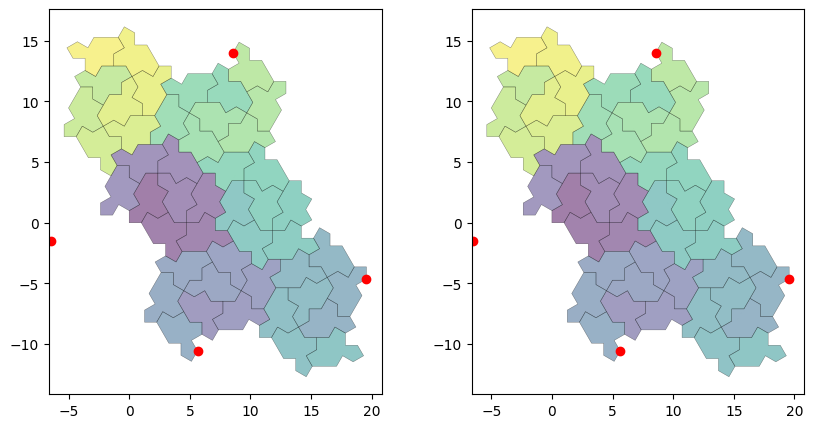

In [3]:
import matplotlib
from matplotlib.axes import Axes

from funbin.geometry import Polygon

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

a, b = 1.0, 1.0


def add_polys(ax: Axes, polys: list[Polygon]) -> None:
    cmap = matplotlib.colormaps["viridis"]
    # allverts = np.vstack([p.verts for p in polys])
    # ax.add_line(Line2D(allverts[:, 0], allverts[:, 1], marker=".", color="k"))
    ax.add_collection(
        PolyCollection(
            [p.verts for p in polys],
            facecolors=[cmap(i / (len(polys))) for i in range(len(polys))],
            edgecolors="black",
            linewidth=0.3,
            alpha=0.5,
        )
    )
    Box.bounding_all(polys).resized(1.1).fit_axes(ax)
    ax.set_aspect("equal")


attr = "H7"

# ported polygons

colormap = {
    "single": [0.0, 1.0, 0.0],
    "unflipped": [1.0, 0.0, 0.0],
    "flipped": [0.0, 0.0, 1.0],
}

state = base_tile_state()
state = extended_state(state)
state = extended_state(state)
labeled_polygons = state.__getattribute__(attr).as_polygons(a, b)
polys = [p for p, _ in labeled_polygons]
add_polys(axes[0], polys)
quad = [pit.eval(a, b) for pit in state.__getattribute__(attr).quad]
axes[0].scatter([p.x for p in quad], [p.y for p in quad], marker="o", color="red")

# vectorized construction
state2 = base_tile_state_2(a, b)
state2 = extended_state_2(state2)
state2 = extended_state_2(state2)
meta_tile = state2.__getattribute__(attr)
polys = meta_tile.as_polygons()
add_polys(axes[1], polys)
axes[1].scatter([pv[0] for pv in meta_tile.quad], [pv[1] for pv in meta_tile.quad], marker="o", color="red")

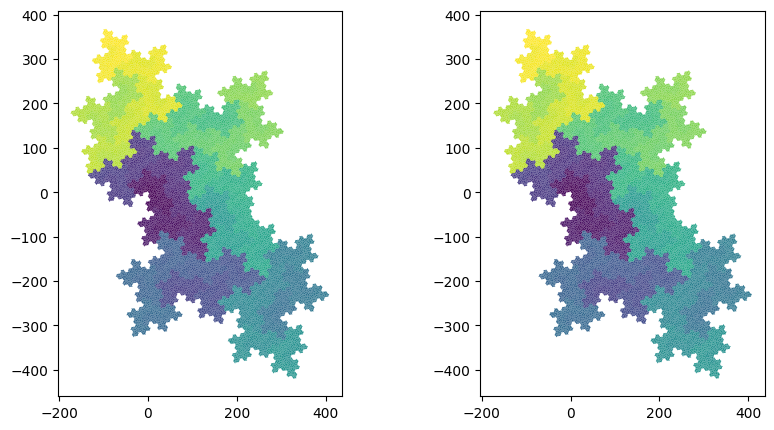

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))


def add_polys(ax: Axes, polys: list[Polygon]) -> None:
    cmap = matplotlib.colormaps["viridis"]
    # allverts = np.vstack([p.verts for p in polys])
    # ax.add_line(Line2D(allverts[:, 0], allverts[:, 1], marker=".", color="k"))
    ax.add_collection(
        PolyCollection(
            [p.verts for p in polys],
            facecolors=[cmap(i / (len(polys))) for i in range(len(polys))],
            edgecolors="none",
        )
    )
    Box.bounding_all(polys).resized(1.1).fit_axes(ax)
    ax.set_aspect("equal")


niter = 5
construction = "H7"

polys = aperiodic_monotile_raw(niter, construction=construction)
add_polys(axes[0], polys)

polys = aperiodic_monotile_raw_2(niter, construction=construction)
add_polys(axes[1], polys)

In [9]:
import time

for niter in range(7):
    for fun, name in zip((aperiodic_monotile_raw, aperiodic_monotile_raw_2), ("old", "new")):
        start = time.time()
        polys = fun(niter)
        print(f"{name}({niter}): {time.time() - start:.3f} sec")

old(0): 0.002 sec
new(0): 0.000 sec
old(1): 0.002 sec
new(1): 0.000 sec
old(2): 0.016 sec
new(2): 0.000 sec
old(3): 0.070 sec
new(3): 0.001 sec
old(4): 0.486 sec
new(4): 0.004 sec
old(5): 6.228 sec
new(5): 0.023 sec
old(6): 43.010 sec
new(6): 0.170 sec
